In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
red_wine = pd.read_csv("/content/drive/MyDrive/veribilimi/denemeler/wine quality/wine+quality/winequality-red.csv",sep=";")
white_wine = pd.read_csv("/content/drive/MyDrive/veribilimi/denemeler/wine quality/wine+quality/winequality-white.csv",sep=";")

In [ ]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
red_wine.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
white_wine.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
red_wine.nunique()

,0
fixed acidity,96
volatile acidity,143
citric acid,80
residual sugar,91
chlorides,153
free sulfur dioxide,60
total sulfur dioxide,144
density,436
pH,89
sulphates,96


In [ ]:
white_wine.nunique()

,0
fixed acidity,68
volatile acidity,125
citric acid,87
residual sugar,310
chlorides,160
free sulfur dioxide,132
total sulfur dioxide,251
density,890
pH,103
sulphates,79


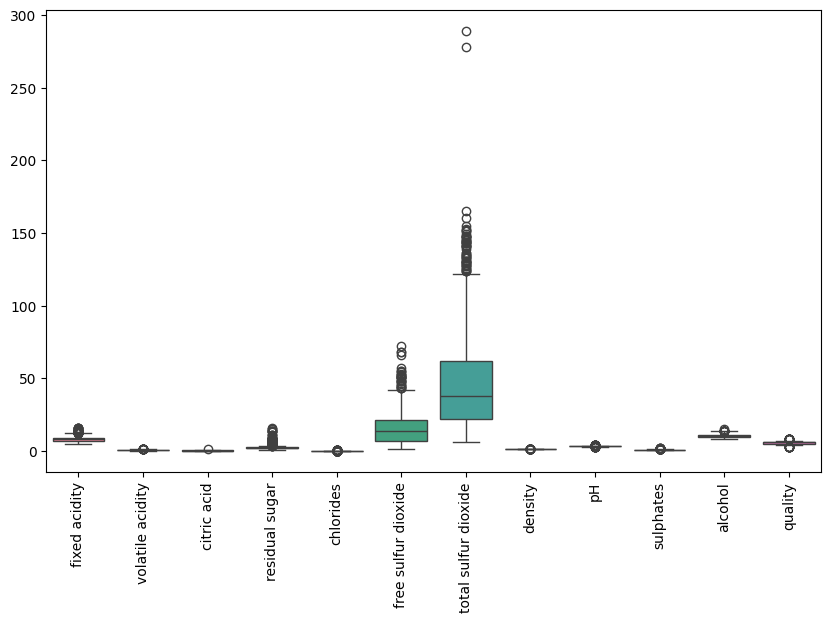

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=red_wine)
plt.xticks(rotation=90)
plt.show()

In [ ]:
numeric_columns = red_wine.select_dtypes(include=[np.number]).columns


for col in numeric_columns:
    Q1 = red_wine[col].quantile(0.25)
    Q3 = red_wine[col].quantile(0.75)
    IQR = Q3 - Q1
    alt_sınır = Q1 - 1.5 * IQR
    üst_sınır = Q3 + 1.5 * IQR


    red_wine = red_wine[~((red_wine[col] < alt_sınır) | (red_wine[col] > üst_sınır))]

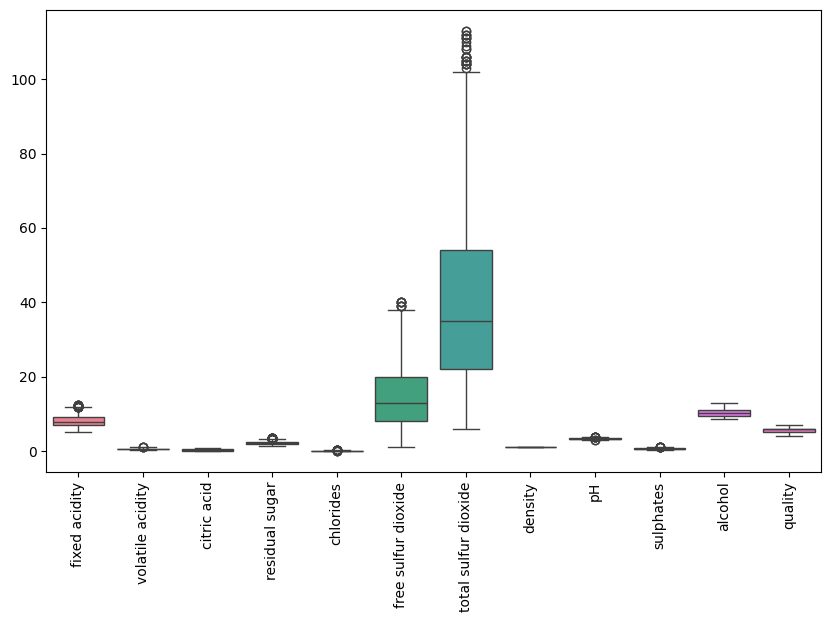

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=red_wine)
plt.xticks(rotation=90)
plt.show()

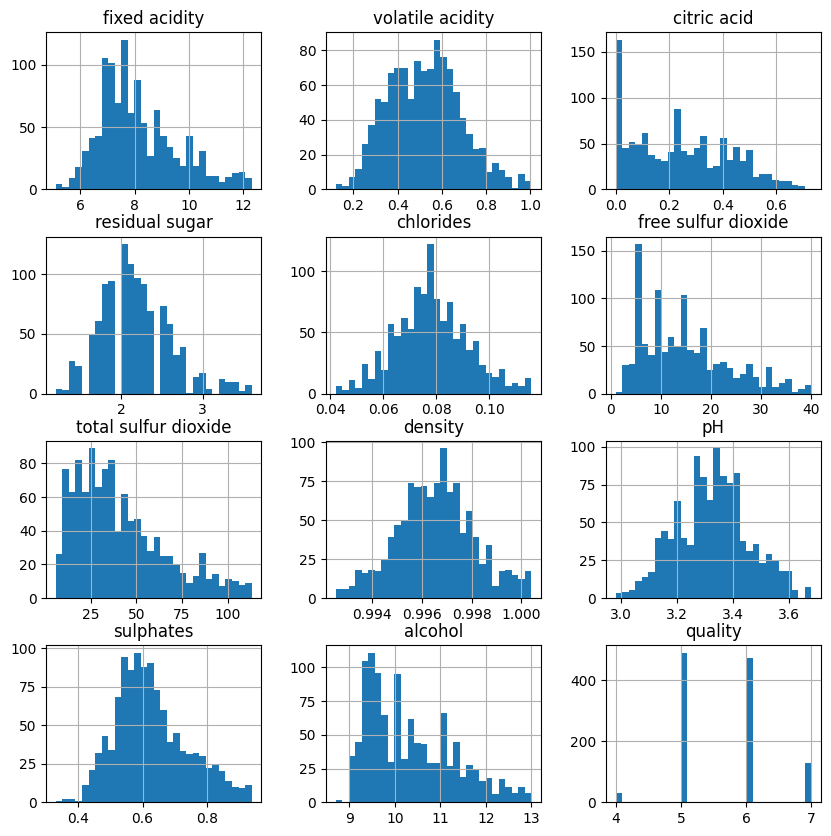

In [ ]:
red_wine.hist(bins=30, figsize=(10,10))
plt.show()

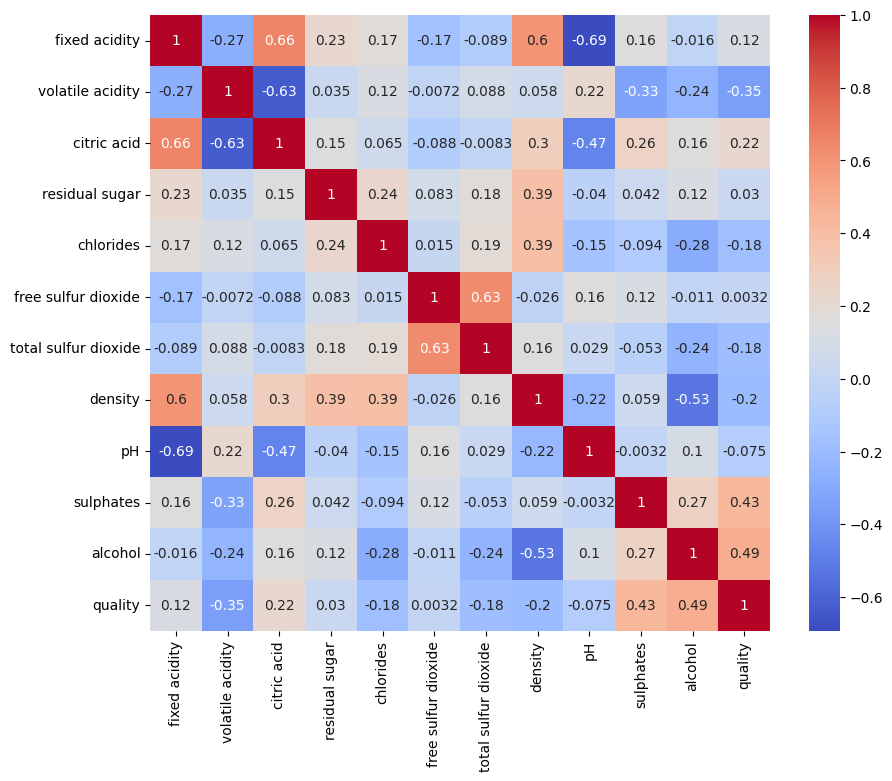

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(red_wine.corr(), annot=True, cmap='coolwarm')
plt.show()

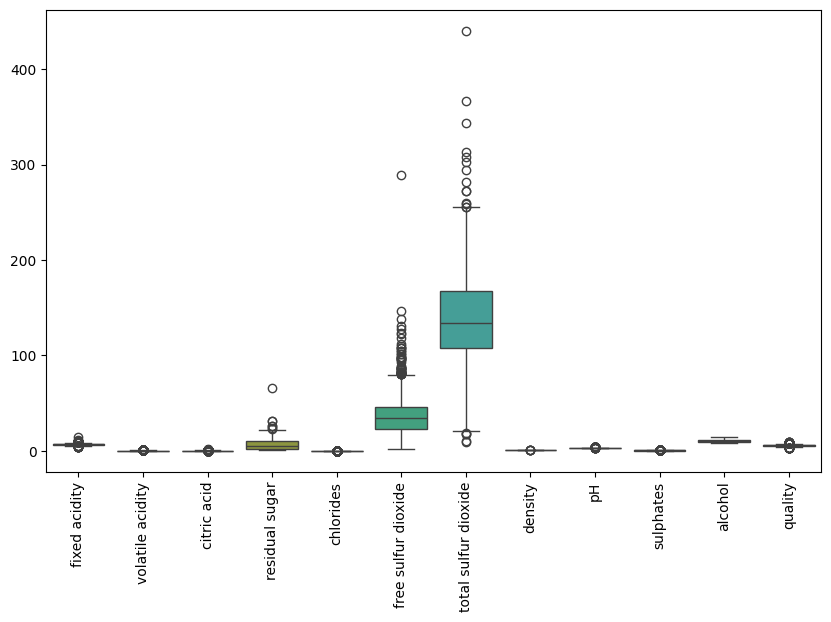

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=white_wine)
plt.xticks(rotation=90)
plt.show()

In [ ]:
numeric_columns1 = white_wine.select_dtypes(include=[np.number]).columns


for col in numeric_columns:
    Q1 = white_wine[col].quantile(0.25)
    Q3 = white_wine[col].quantile(0.75)
    IQR = Q3 - Q1
    alt_sınır = Q1 - 1.5 * IQR
    üst_sınır = Q3 + 1.5 * IQR


    white_wine = white_wine[~((white_wine[col] < alt_sınır) | (white_wine[col] > üst_sınır))]

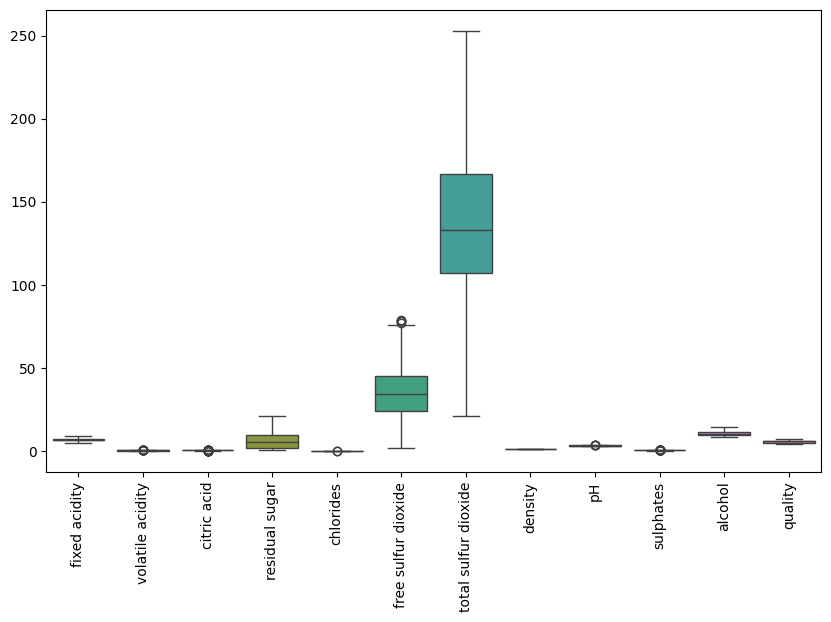

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=white_wine)
plt.xticks(rotation=90)
plt.show()

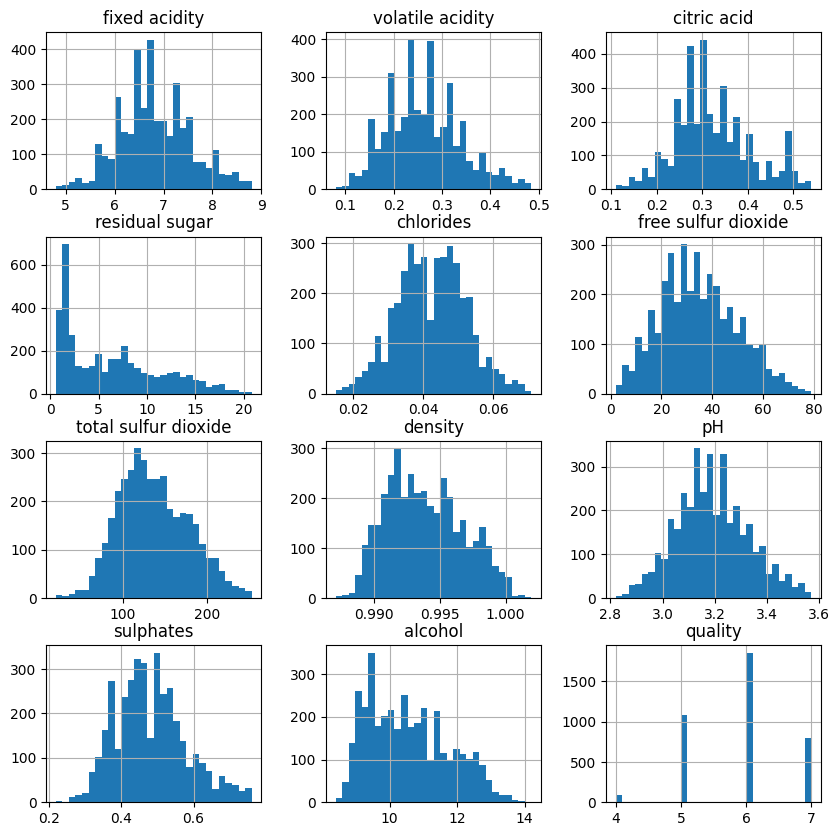

In [ ]:
white_wine.hist(bins=30, figsize=(10,10))
plt.show()

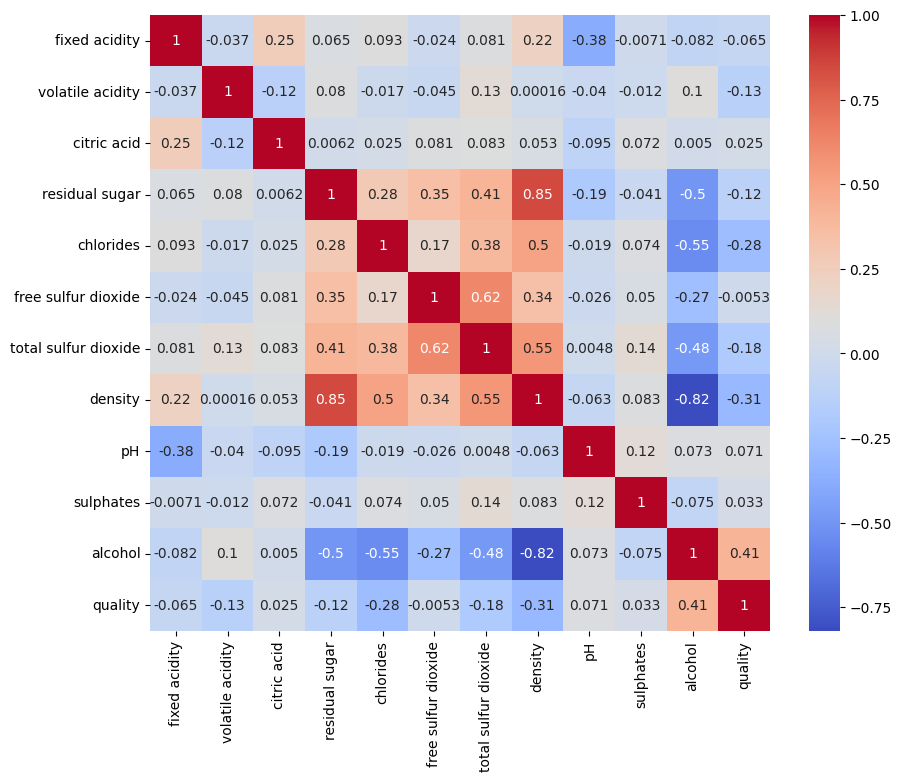

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(white_wine.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
red_wine["quality"]=red_wine["quality"].apply(lambda x: 1 if x>5 else 0)
white_wine["quality"]=white_wine["quality"].apply(lambda x: 1 if x>5 else 0)

Red Wine

In [77]:
X=red_wine.drop("quality",axis=1)
y=red_wine["quality"]

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [ ]:
loj_reg = LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_result = GridSearchCV(loj_reg, param_grid, cv=10)
grid_result.fit(X_train, y_train)
best_params = grid_result.best_params_
best_model_red_loj = grid_result.best_estimator_

y_pred = best_model_red_loj.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("En iyi parametreler:", best_params)
print("Test Doğruluk Oranı:", accuracy)
print("ROC AUC:", roc_auc)

En iyi parametreler: {'C': 0.1}
Test Doğruluk Oranı: 0.7155555555555555
ROC AUC: 0.7187945509266592


In [ ]:
xgb = XGBClassifier()
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model_red_xgb = grid_search.best_estimator_

y_pred = best_model_red_xgb.predict(X_test)
y_prob = best_model_red_xgb.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("En iyi parametreler:", best_params)
print("Test Doğruluk Oranı:", accuracy)
print("ROC AUC:", roc_auc)

Fitting 10 folds for each of 27 candidates, totalling 270 fits
En iyi parametreler: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
Test Doğruluk Oranı: 0.7911111111111111
ROC AUC: 0.790828449231744


In [ ]:
cv_scores = cross_val_score(best_model_red_xgb, X_train, y_train, cv=10)
print(f"Cross-validation scores: {cv_scores}")
print(f"Average CV score: {cv_scores.mean()}")

Cross-validation scores: [0.81111111 0.8        0.74444444 0.87777778 0.78888889 0.75555556
 0.8        0.71111111 0.76666667 0.76404494]
Average CV score: 0.7819600499375781


In [ ]:
svc = SVC()
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}
grid_search = GridSearchCV(estimator=svc, param_grid= param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model_red_svc = grid_search.best_estimator_

y_pred = best_model_red_svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("En iyi parametreler:", best_params)
print("Test Doğruluk Oranı:", accuracy)
print("ROC AUC:", roc_auc)


Fitting 10 folds for each of 6 candidates, totalling 60 fits
En iyi parametreler: {'C': 1, 'kernel': 'rbf'}
Test Doğruluk Oranı: 0.7333333333333333
ROC AUC: 0.7361793125297006


In [ ]:
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'p': [1, 2]
}
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid,n_jobs=-1,cv=10,verbose=2)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model_red_knn = grid_search.best_estimator_

y_pred = best_model_red_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("En iyi parametreler:", best_params)
print("Test Doğruluk Oranı:", accuracy)
print("ROC AUC:", roc_auc)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
En iyi parametreler: {'metric': 'minkowski', 'n_neighbors': 11, 'p': 2, 'weights': 'distance'}
Test Doğruluk Oranı: 0.7688888888888888
ROC AUC: 0.7674639632504356


In [ ]:
nb = GaussianNB()
param_grid = {
    'var_smoothing': [1e-10 ,1e-9, 1e-8, 1e-7, 1e-6]
}
grid_search = GridSearchCV(estimator=nb, param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model_red_nb = grid_search.best_estimator_

y_pred = best_model_red_nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("En iyi parametreler:", best_params)
print("Test Doğruluk Oranı:", accuracy)
print("ROC AUC:", roc_auc)




Fitting 10 folds for each of 5 candidates, totalling 50 fits
En iyi parametreler: {'var_smoothing': 1e-10}
Test Doğruluk Oranı: 0.7111111111111111
ROC AUC: 0.7167353080944083


White wine

In [83]:
X=white_wine.drop("quality",axis=1)
y=white_wine["quality"]

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [ ]:
loj_reg = LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_result = GridSearchCV(loj_reg, param_grid, cv=10)
grid_result.fit(X_train, y_train)
best_params = grid_result.best_params_
best_model_white_loj = grid_result.best_estimator_

y_pred = best_model_white_loj.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("En iyi parametreler:", best_params)
print("Test Doğruluk Oranı:", accuracy)
print("ROC AUC:", roc_auc)

En iyi parametreler: {'C': 10}
Test Doğruluk Oranı: 0.744429882044561
ROC AUC: 0.6527082143731137


In [ ]:
xgb = XGBClassifier()
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model_white_xgb = grid_search.best_estimator_

y_pred = best_model_white_xgb.predict(X_test)
y_prob = best_model_white_xgb.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("En iyi parametreler:", best_params)
print("Test Doğruluk Oranı:", accuracy)
print("ROC AUC:", roc_auc)

Fitting 10 folds for each of 27 candidates, totalling 270 fits
En iyi parametreler: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}
Test Doğruluk Oranı: 0.8256880733944955
ROC AUC: 0.780075862631536


In [ ]:
cv_scores = cross_val_score(best_model_white_xgb, X_train, y_train, cv=10)
print(f"Cross-validation scores: {cv_scores}")
print(f"Average CV score: {cv_scores.mean()}")

Cross-validation scores: [0.81699346 0.82679739 0.81639344 0.81311475 0.79344262 0.85245902
 0.81311475 0.80327869 0.83606557 0.85245902]
Average CV score: 0.8224118718525661


In [ ]:
svc = SVC()
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}
grid_search = GridSearchCV(estimator=svc, param_grid= param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model_white_svc = grid_search.best_estimator_

y_pred = best_model_white_svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("En iyi parametreler:", best_params)
print("Test Doğruluk Oranı:", accuracy)
print("ROC AUC:", roc_auc)


Fitting 10 folds for each of 6 candidates, totalling 60 fits
En iyi parametreler: {'C': 10, 'kernel': 'rbf'}
Test Doğruluk Oranı: 0.7889908256880734
ROC AUC: 0.7352720450281427


In [ ]:
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'p': [1, 2]
}
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid,n_jobs=-1,cv=10,verbose=2)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model_white_knn = grid_search.best_estimator_

y_pred = best_model_white_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("En iyi parametreler:", best_params)
print("Test Doğruluk Oranı:", accuracy)
print("ROC AUC:", roc_auc)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
En iyi parametreler: {'metric': 'minkowski', 'n_neighbors': 11, 'p': 2, 'weights': 'distance'}
Test Doğruluk Oranı: 0.8256880733944955
ROC AUC: 0.7726609021943063


In [ ]:
nb = GaussianNB()
param_grid = {
    'var_smoothing': [1e-10 ,1e-9, 1e-8, 1e-7, 1e-6]
}
grid_search = GridSearchCV(estimator=nb, param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model_white_nb = grid_search.best_estimator_

y_pred = best_model_white_nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("En iyi parametreler:", best_params)
print("Test Doğruluk Oranı:", accuracy)
print("ROC AUC:", roc_auc)




Fitting 10 folds for each of 5 candidates, totalling 50 fits
En iyi parametreler: {'var_smoothing': 1e-10}
Test Doğruluk Oranı: 0.7103538663171691
ROC AUC: 0.6925809609266662


aks

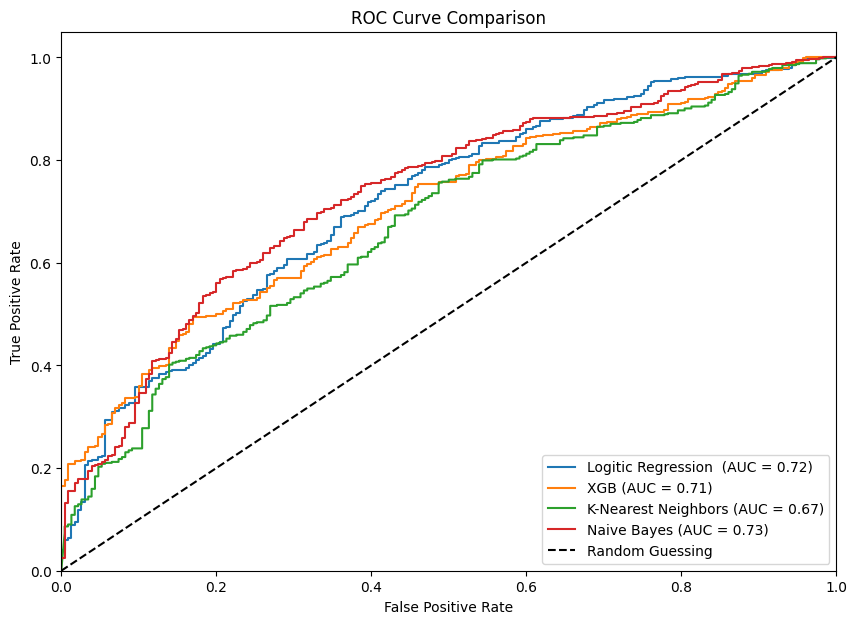

In [ ]:
models_red = {
    "Logitic Regression ": best_model_red_loj,
    "XGB": best_model_red_xgb,
    "K-Nearest Neighbors": best_model_red_knn,
    "Naive Bayes": best_model_red_nb
}
plt.figure(figsize=(10, 7))


for model_name, model in models_red.items():

    y_prob = model.predict_proba(X_test)[:, 1]


    fpr, tpr, _ = roc_curve(y_test, y_prob)


    roc_auc = roc_auc_score(y_test, y_prob)


    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")


plt.show()

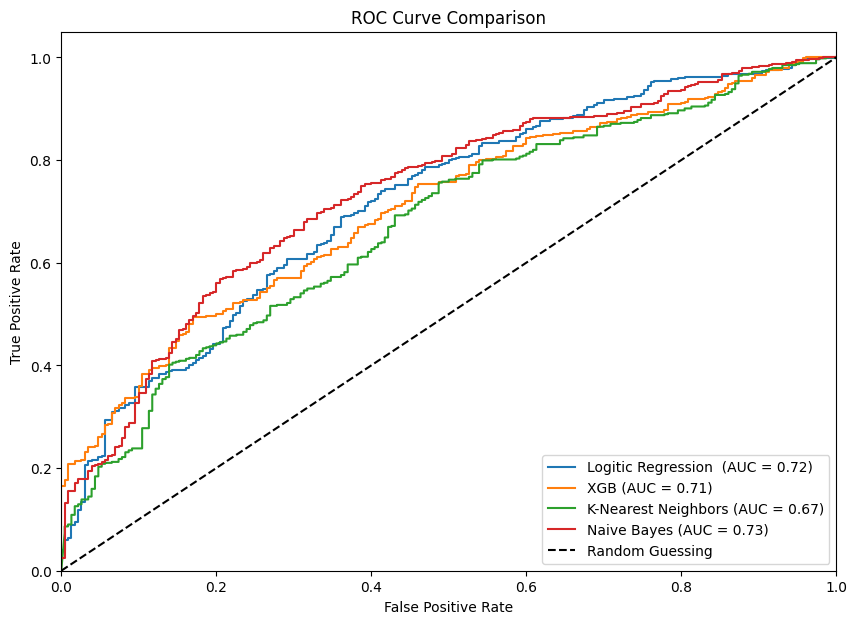

In [ ]:
models_white = {
    "Logitic Regression ": best_model_white_loj,
    "XGB": best_model_white_xgb,
    "K-Nearest Neighbors": best_model_white_knn,
    "Naive Bayes": best_model_white_nb
}
plt.figure(figsize=(10, 7))


for model_name, model in models_red.items():

    y_prob = model.predict_proba(X_test)[:, 1]


    fpr, tpr, _ = roc_curve(y_test, y_prob)


    roc_auc = roc_auc_score(y_test, y_prob)


    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")


plt.show()

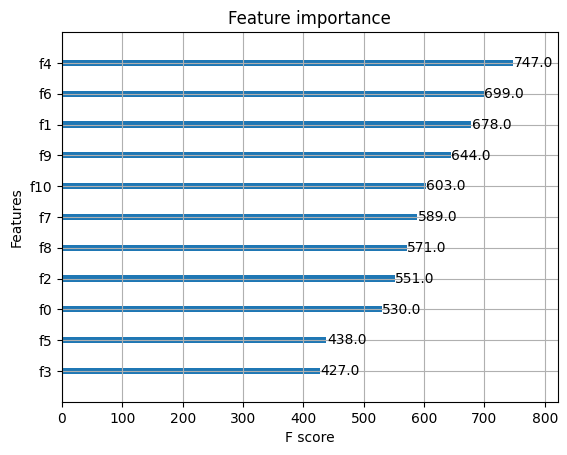

In [66]:
from xgboost import plot_importance
plot_importance(best_model_red_xgb)
plt.show()


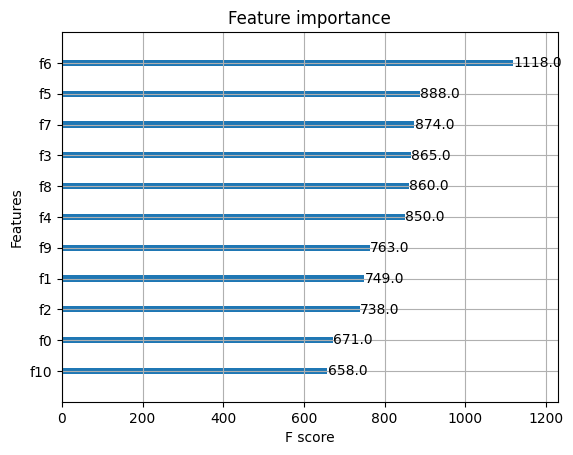

In [67]:
plot_importance(best_model_white_xgb)
plt.show()

K-Means Cluster Red